# Importing Libraries

In [4]:
import numpy as np 
import pandas as pd 

# Loading Data

In [5]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Shape

In [6]:
df.shape

(891, 12)

# Check for missing values


In [7]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Fill missing Age values with the median age


In [8]:
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked values with the mode


In [9]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Cabin has too many missing values, so it's better to drop this column


In [10]:
df.drop(columns=['Cabin'], inplace=True)

# Confirm all missing values have been handled


In [11]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# Data types

In [12]:
print(df.dtypes)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object


# Importing necessary libraries

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of the 'Age' column


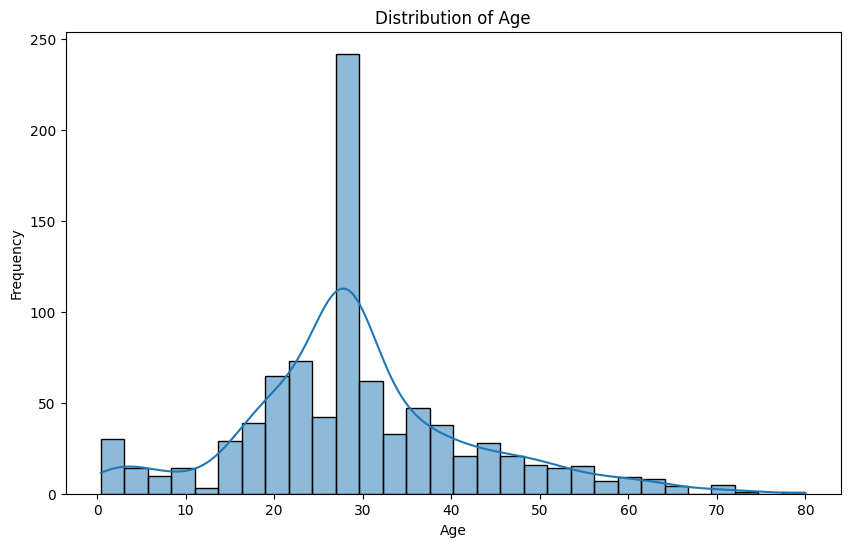

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualizing the survival rate by gender


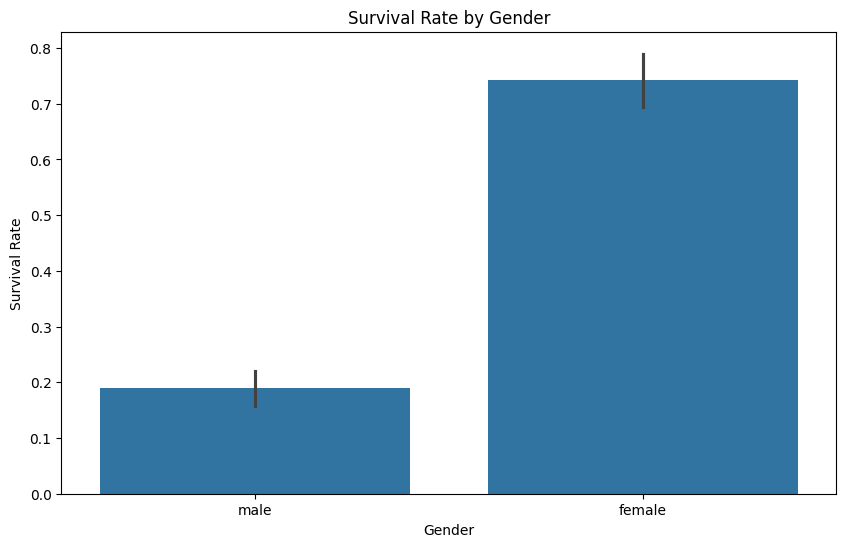

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

# Visualizing the survival rate by passenger class


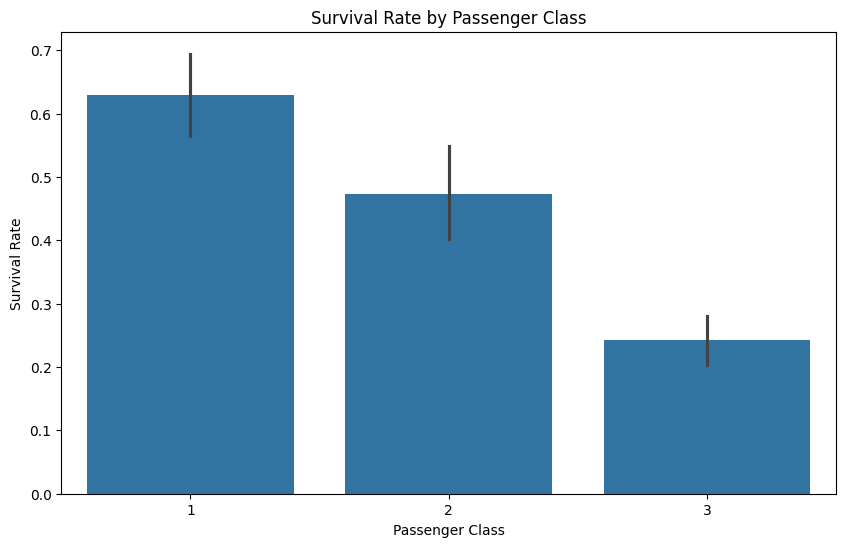

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# Visualizing the survival rate by embarkation point


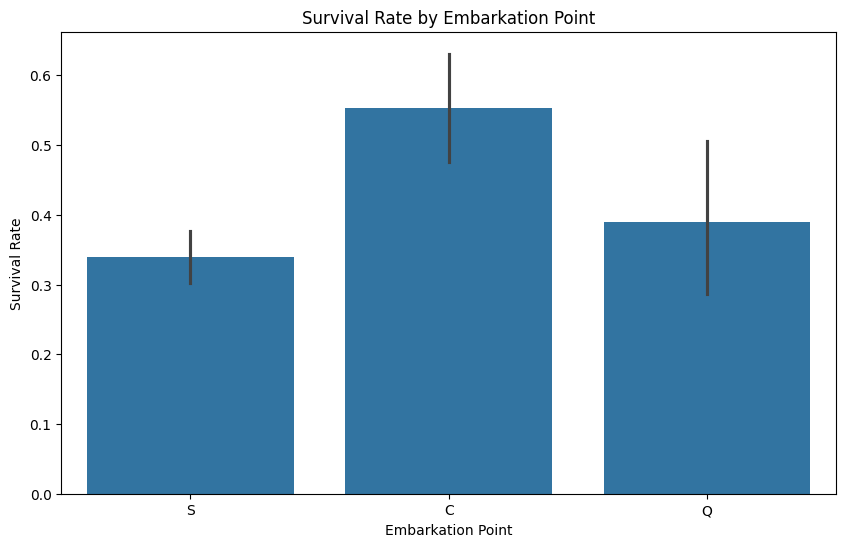

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival Rate by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Survival Rate')
plt.show()

# Correlation Analysis

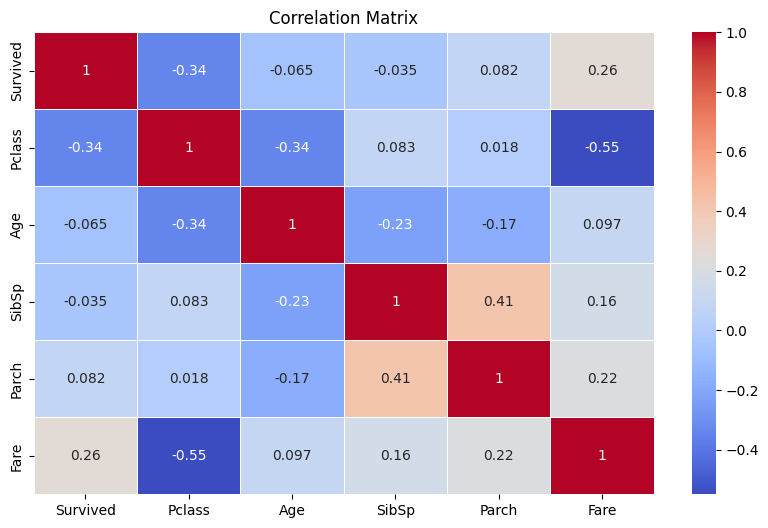

In [18]:
numeric_df = df.select_dtypes(include=[np.number]).drop(columns=['PassengerId'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# Age group analysis

C:\Users\PC\AppData\Local\Temp\ipykernel_3992\1962211619.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='Survived', data=df, palette='viridis')


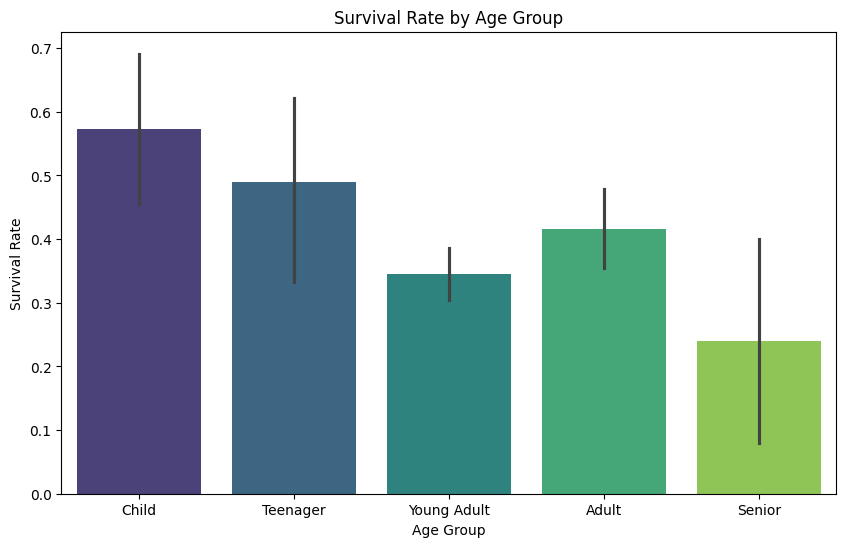

In [19]:
bins = [0, 12, 18, 35, 60, 80]
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Survived', data=df, palette='viridis')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()


# Family size analysis

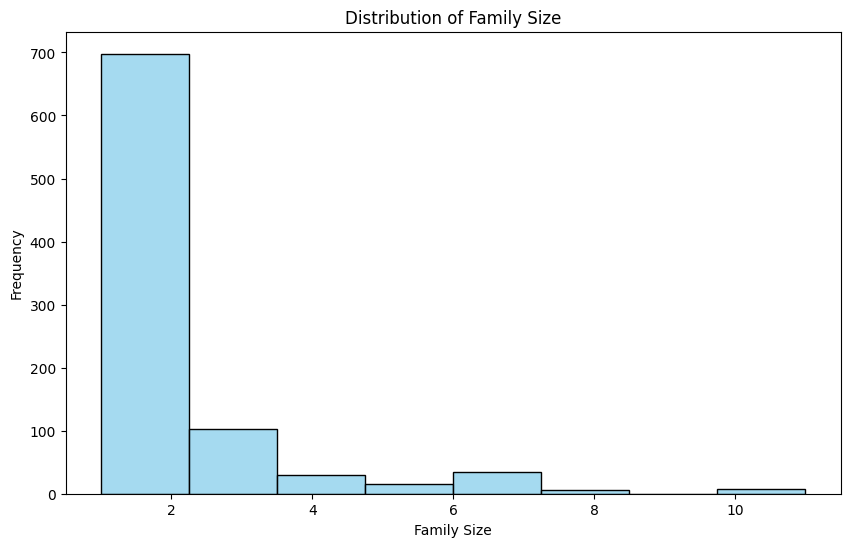

In [20]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


plt.figure(figsize=(10, 6))
sns.histplot(df['FamilySize'], bins=8, kde=False, color='skyblue')
plt.title('Distribution of Family Size')
plt.xlabel('Family Size')
plt.ylabel('Frequency')
plt.show()

# Fare analysis

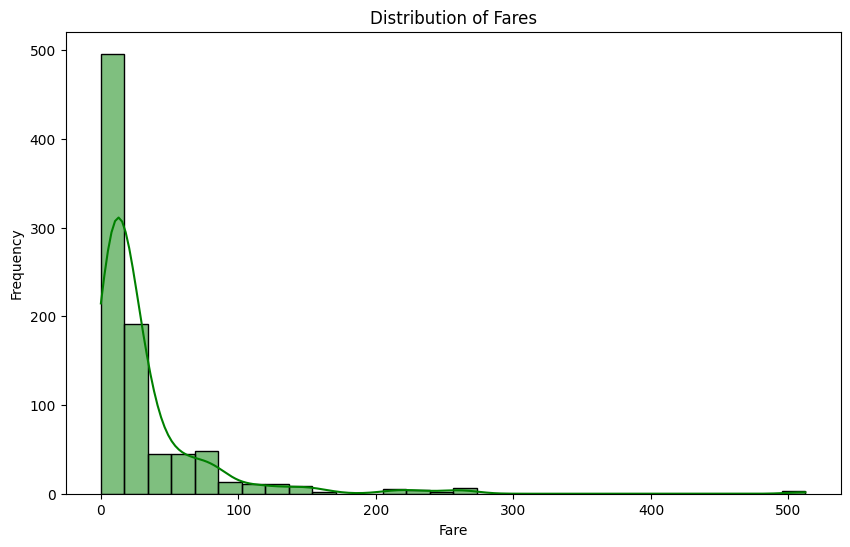

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], bins=30, kde=True, color='green')
plt.title('Distribution of Fares')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# Survival Rate by Passenger Class and Gender


<Figure size 1200x800 with 0 Axes>

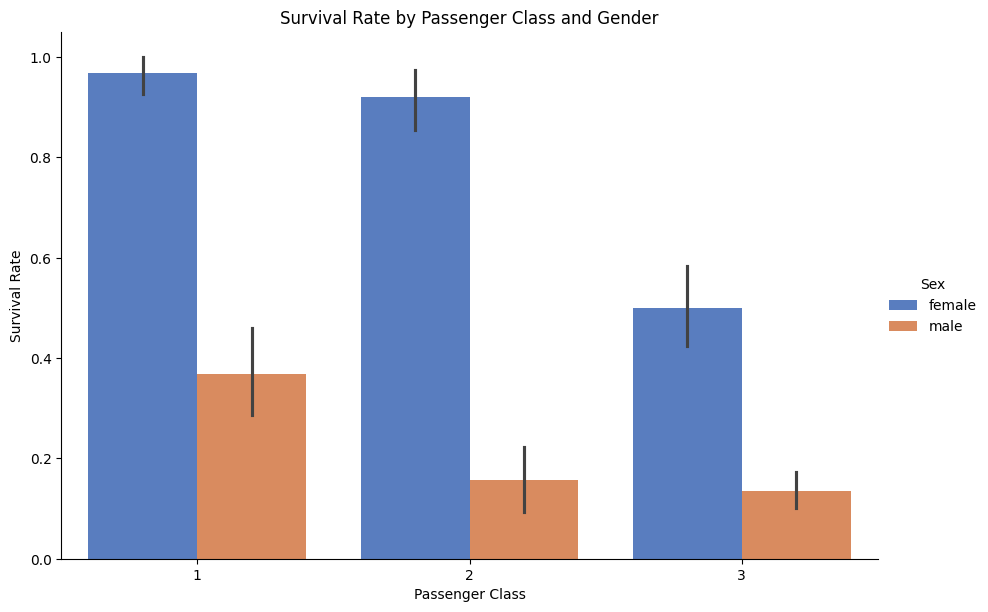

In [22]:
plt.figure(figsize=(12, 8))
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df, kind='bar', palette='muted', height=6, aspect=1.5)
plt.title('Survival Rate by Passenger Class and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


# Pair Plot for Numerical Features


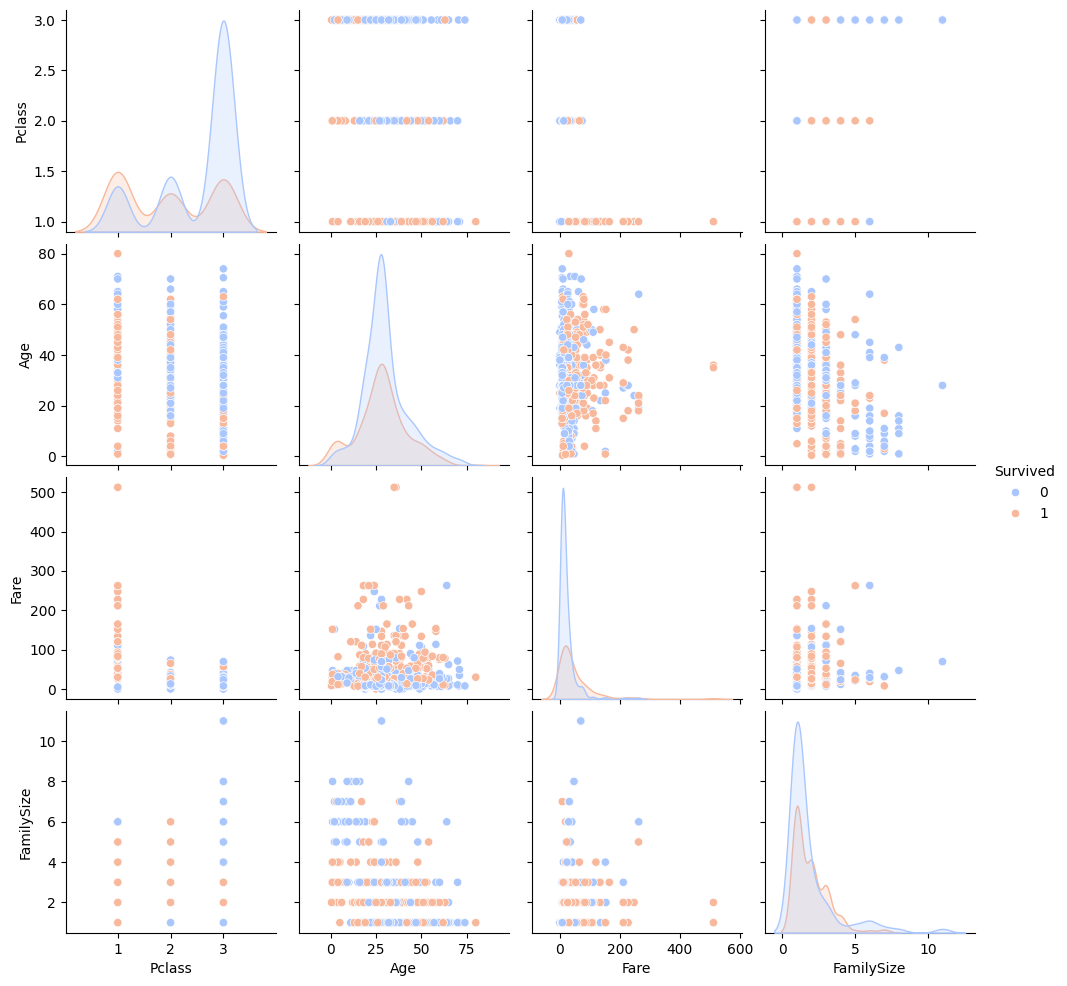

In [23]:
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare', 'FamilySize']], hue='Survived', palette='coolwarm')
plt.show()


# Swarm Plot for Age

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 10.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


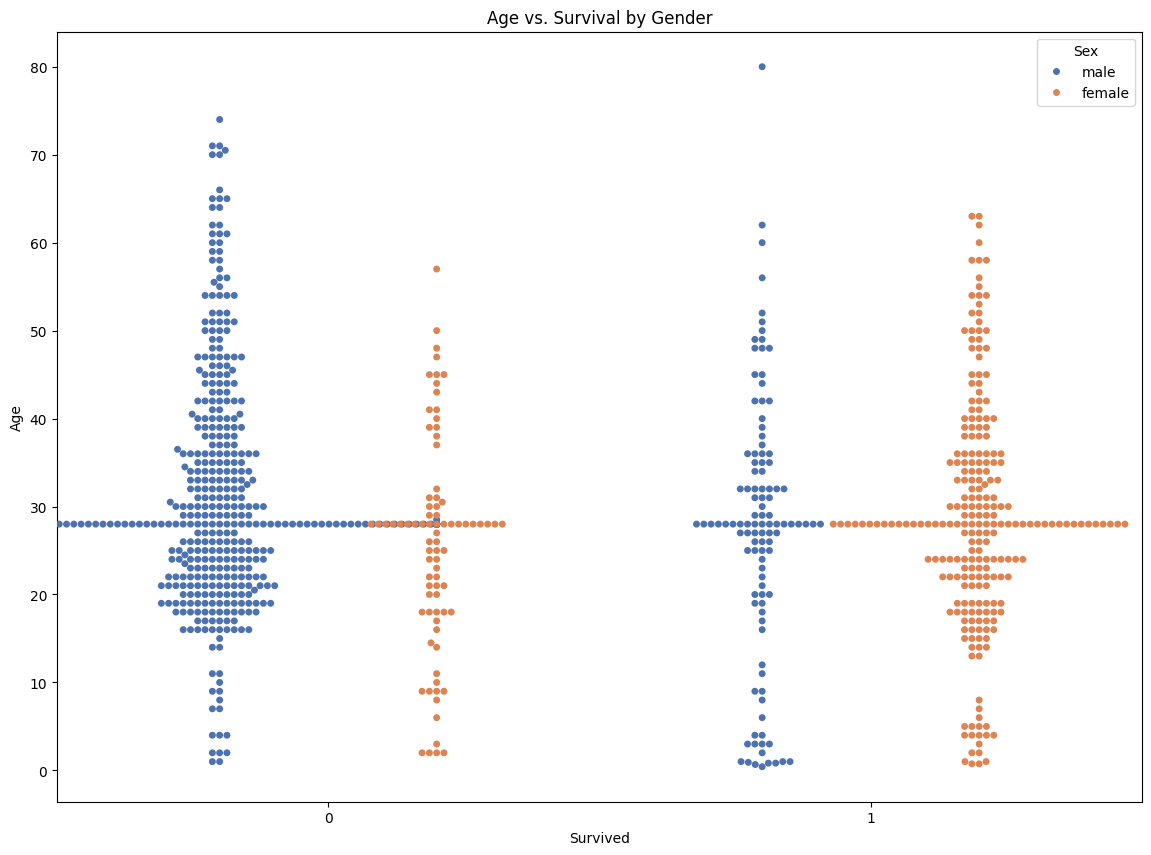

In [24]:
plt.figure(figsize=(14, 10))
sns.swarmplot(x='Survived', y='Age', hue='Sex', data=df, palette='deep', dodge=True)
plt.title('Age vs. Survival by Gender')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()